# Convolutiona Neural Networks for Time Series

We have seen CNN priomarly applied to input images or data that are 2D, but in addition, 1D CNN can be used to to capture time dependencies on a sequantial input, useful for time series forecasting.
 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Set base paths for data and aux files

In [ ]:
BASE_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/'

PLOTS_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/plots/'
DUMPS_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/dumps/'
DATA_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/data/'
CHECK_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/checkpoints/'

IMAGES_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/images/'


## 2D Convoluitions

the 2D CNN have been eidely used to address the problamatic of image classification and related problems with great success. Ocnsidering the fact tha images have a rectagunla dimension $w$ and $h$ width and height respectively. Using a image grayscale with size $28 \times 28$ and a first dense layer containing 100 neurons, the number of trainable weight is $28 \times 28 \times 100$ = 78400. As examples, the dataset CIFAR-10 with  color images with size $32 \times 32 \times 3$ and a firt dense layer with 100 mneurons the number of trainable parameters is $32 \times 32 \times 3 \times 100 = 307200$. This means that only using dense layers makes the problem hard, since when increasinf the number of hidden layers the number of parameters increases drasticaly. To address this, CNN enable to connect neurons to only patches of the images (activations regions/maps) Considering the diagram, a filter with dimension is applied to a local image patch. The third dimension of the filter is the same as the number of color channels of the image. The weight of each neuron in the filtyer is multiplied with the corresponding  pixel value in the image. The final feature out of this  local patch is computed by adding tehse individual values and the added bias weight and the passing the sum through an activation function. The popular on is teh ReLU. ReLu has some characteristics that meke it useful for CNN. The first derivative of ReLu is either 0 or 1, making appropriate for gardient calculations. Concerning the convolution layers, a CNN contains several layer of convolutional layers, generally with many filters to learn different features representations.

<img src="../images/cnn_1.png" width=400 height=200 title= Simple LSTM/>

To cover all the image, the filter is moved with a horizontal stride $ 4 \times 4$ and a vertical stride $2 \times 2$. This is the convolutiomns operation. The features resulting from convolutions over the entire image forms a rectangular feature map. To better understand the process of feature map generation, lets condider a image with one color (grayscale) with the pixel values as represneetd on figure. By applying a $3 \times 3$ conv filter and move horizontally and vertical stride of 1.

The first convolution corresponds to $ 1 \times -1 + 2 \times 1 + 2 \times 2 + 1 \times 1 = 6$ Then the ReLu activations acts as an identity function. This convolution precess creates the feature map.

<img src="../images/cnn_2.png" width=600 height=600 title= Simple LSTM/>

Is Important to observe that a filter of sise $ 2 \times 2$ using a verticla and horizontal stride of 1 unit shrinks  the size of the feature map to #3 \times 3$ given a originalmimage of $6 \times 6$. Is possible to ensure the the feature map is the same size of the original image by concatenating zero-valued fixels acros the horizontal and vertical borders of the image. Adding zero-valued pixels is defined as zero-padding that, in this parituclar case would made the input image of a dimension $2 \times 2$. A featur map generated from teh zero-padded image is show bellow .

<img src="../images/cnn_3.png" width=400 height=200 title= Simple LSTM/>

The stacking of several convolution layers enable the generation of better features from the original images, and in the final layers, tehse features are passed to a fully-connected dense layers the generate a softmaw output over the set of objects classes.


In term os pratical, we down rely only on convolutions to downsample a original image or the intermediate feature maps. if we rely only on the convolutions layers to perform thius task, the number of parameters to be trained would be huge.

In CNN we make use of another apporach to downsample the input image.
The first the convolution layers they are used primarily  for extract features such as corners, edges, shapes and so on having a inherent downsampling also.

The second, to achive a more effective downsampling, polling layers the apppky filter to local patch of a feature map to compute a single feature. This filter is convolved over the entire feature map. Polling layers do not have trainable weights, and are just simple arithmetic functions such as maximum or average to generate their output feature maps.  In addition, polling layers enable the CNN to be invariant to image rotation, achiving a better accuracy.

<img src="../images/cnn_4.png" width=400 height=200 title= Simple LSTM/>

An common CNN is formed by a set of stacked  layers, with the image showing a two blocks of convolutional layers followed by a block of fully-connected dense layers. The last layer is a softmax layer that provides the predicted probabilities acros the set of classes, with the highter probability class being the predicted one. 

<img src="images/cnn_5.png" width=600 height=200 title= Simple LSTM/>


## 1D Convolution

1D convolutions care suitible also for time series forescasting. Considering a times series having $1 \times m$ observations is similar to a image of dimension $p$, with the height of a single pixel. 1D convolutions cna be applied using $1 \times 3$ filters for example, and the filter being moved along only the horizaontal direction with strides with the oder of the regresion we want, for example $1 \times 8$. time units.

Considering a filter $-1, 1, 2$ vonvolved with the times series of 10 steps as represneetd on image, with the filter moved with a stride of 1. The original time series is not zero-padded, resulting in a feature map with two units shorter than the original time series lenght. A polli g layer can be stacked with the convolutional layer to downsample the feature map even further.


<img src="images/cnn_6.png" width=400 height=200 title= Simple LSTM/>

The approch of using a $1 \times 3$ convolution filter correspoinds to training several local auto regressive models of order three. These local models generate features over the 1D convolution layer, it creates moving averages over the feature map generated by the preceding convolutiona layer. Several 1D convolution and pooling layers, when stacked with each other, give a powerful way of extracting features from the original
time series. Thus, using CNNs proves to be effective when dealing with complex, nonlinear time series such as audio waves, speech, and so on. As a matter of fact, CNNs have been successfully applied in classifying audio waves also using 2D spectrograms or 1D convolutions in a end to end fashion. 


## Lets play with 1D convolutions for forecast


In [ ]:
!pip install -U seaborn==0.9.0

Requirement already up-to-date: seaborn==0.9.0 in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [ ]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime


In [ ]:
# Read the dataset into a pandas df
df = pd.read_csv(DATA_PATH + 'PRSA_data_2010.1.1-2014.12.31.csv')

print('Shape of the dataframe:', df.shape)

# Show some details
df.head(5)


Shape of the dataframe: (43824, 13)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)


Text(0.5, 1.0, 'Box plot of PRES')

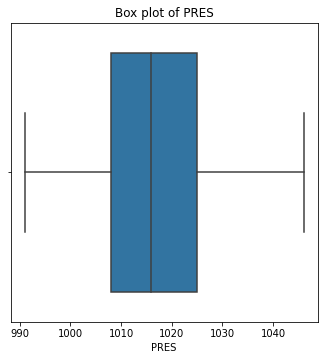

In [ ]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df['PRES'])
g.set_title('Box plot of PRES')


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


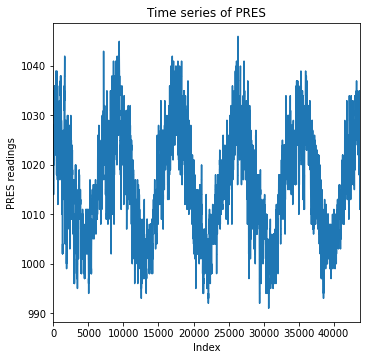

In [ ]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['PRES'])
g.set_title('Time series of PRES')
g.set_xlabel('Index')
g.set_ylabel('PRES readings')

plt.savefig(PLOTS_PATH + 'cnn_Time series of PRES' + '.png')
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_PRES'] = scaler.fit_transform(np.array(df['PRES']).reshape(-1, 1))


In [ ]:
"""
Let's start by splitting the dataset into train and validation. The dataset's time period if from
Jan 1st, 2010 to Dec 31st, 2014. The first fours years - 2010 to 2013 is used as train and
2014 is kept for validation.
"""
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)


Shape of train: (35064, 15)
Shape of test: (8760, 15)


In [ ]:
#First five rows of train
df_train.head()


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_PRES
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00,0.545455
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00,0.527273
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00,0.509091
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00,0.509091
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00,0.490909


In [ ]:
#First five rows of validation
df_val.head()


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_PRES
35064,35065,2014,1,1,0,24.0,-20,7.0,1014.0,NW,143.48,0,0,2014-01-01 00:00:00,0.418182
35065,35066,2014,1,1,1,53.0,-20,7.0,1013.0,NW,147.50,0,0,2014-01-01 01:00:00,0.400000
35066,35067,2014,1,1,2,65.0,-20,6.0,1013.0,NW,151.52,0,0,2014-01-01 02:00:00,0.400000
35067,35068,2014,1,1,3,70.0,-20,6.0,1013.0,NW,153.31,0,0,2014-01-01 03:00:00,0.400000
35068,35069,2014,1,1,4,79.0,-18,3.0,1012.0,cv,0.89,0,0,2014-01-01 04:00:00,0.381818


In [ ]:
#Reset the indices of the validation set
df_val.reset_index(drop=True, inplace=True)


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


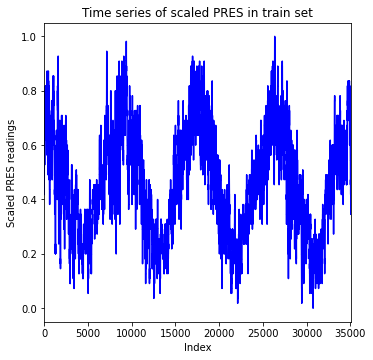

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


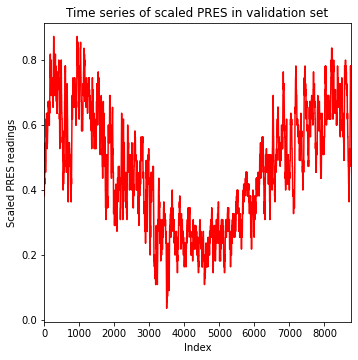

In [ ]:
"""
The train and validation time series of scaled PRES is also plotted.
"""

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_train['scaled_PRES'], color='b')
g.set_title('Time series of scaled PRES in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled PRES readings')

plt.savefig(PLOTS_PATH + 'cnn_Time series of scaled PRES in train set' + '.png')
plt.show()

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_val['scaled_PRES'], color='r')
g.set_title('Time series of scaled PRES in validation set')
g.set_xlabel('Index')
g.set_ylabel('Scaled PRES readings')

plt.savefig(PLOTS_PATH + 'cnn_Time series of scaled PRES in validation set' + '.png')
plt.show()


In [ ]:
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y
    

In [ ]:
X_train, y_train = makeXy(df_train['scaled_PRES'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)


Shape of train arrays: (35057, 7) (35057,)


In [ ]:
X_val, y_val = makeXy(df_val['scaled_PRES'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)


Shape of validation arrays: (8753, 7) (8753,)


In [ ]:
#X_train and X_val are reshaped to 3D arrays
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)),\
                 X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
print('Shape of arrays after reshaping:', X_train.shape, X_val.shape)


Shape of arrays after reshaping: (35057, 7, 1) (8753, 7, 1)


In [ ]:
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import ZeroPadding1D
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import AveragePooling1D
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint


In [ ]:
#Define input layer which has shape (None, 7) and of type float32. None indicates the number of instances
input_layer = Input(shape=(7,1), dtype='float32')


ZeroPadding1D layer is added next to add zeros at the beginning and end of each series. Zeropadding ensure that the downstream convolution layer does not reduce the dimension of the output sequences. Pooling layer, added after the convolution layer is used to downsampling the input.


In [ ]:
#Add zero padding
zeropadding_layer = ZeroPadding1D(padding=1)(input_layer)


The first argument of Conv1D is the number of filters, which determine the number of features in the output. Second argument indicates length of the 1D convolution window. The third argument is strides and represent the number of places to shift the convolution window. Lastly, setting use_bias as True, add a bias value during computation of an output feature. Here, the 1D convolution can be thought of as generating local AR models over rolling window of three time units.


In [ ]:
#Add 1D convolution layer
conv1D_layer = Conv1D(64, 3, strides=1, use_bias=True)(zeropadding_layer)


AveragePooling1D is added next to downsample the input by taking average over pool size of three with stride of one timesteps. The average pooling in this case can be thought of as taking moving averages over a rolling window of three time units. We have used average pooling instead of max pooling to generate the moving averages.


In [ ]:
#Add AveragePooling1D layer
avgpooling_layer = AveragePooling1D(pool_size=3, strides=1)(conv1D_layer)

The preceeding pooling layer returns 3D output. Hence before passing to the output layer, a Flatten layer is added. The Flatten layer reshapes the input to (number of samples, number of timesteps*number of features per timestep), which is then fed to the output layer


In [ ]:
#Add Flatten layer
flatten_layer = Flatten()(avgpooling_layer)


In [ ]:
dropout_layer = Dropout(0.2)(flatten_layer)


In [ ]:
#Finally the output layer gives prediction for the next day's air pressure.
output_layer = Dense(1, activation='linear')(dropout_layer)


In [ ]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')#SGD(lr=0.001, decay=1e-5))
ts_model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 7, 1)]            0         
_________________________________________________________________
zero_padding1d (ZeroPadding1 (None, 9, 1)              0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7, 64)             256       
_________________________________________________________________
average_pooling1d (AveragePo (None, 5, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 320)               0         
_________________________________________________________________
dropout (Dropout)            (None, 320)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 321   

In [ ]:
# Error

save_weights_at = os.path.join(CHECK_PATH , 'PRSA_data_Air_Pressure_1DConv_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
history = ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)


Epoch 1/20
2192/2192 [==============================] - 3s 1ms/step - loss: 0.0129 - val_loss: 0.0141
Epoch 2/20
2192/2192 [==============================] - 3s 1ms/step - loss: 0.0129 - val_loss: 0.0138
Epoch 3/20
2192/2192 [==============================] - 3s 1ms/step - loss: 0.0130 - val_loss: 0.0094
Epoch 4/20
2192/2192 [==============================] - 3s 1ms/step - loss: 0.0130 - val_loss: 0.0096
Epoch 5/20
2192/2192 [==============================] - 3s 1ms/step - loss: 0.0130 - val_loss: 0.0094
Epoch 6/20
2192/2192 [==============================] - 3s 1ms/step - loss: 0.0132 - val_loss: 0.0099
Epoch 7/20
2192/2192 [==============================] - 3s 1ms/step - loss: 0.0131 - val_loss: 0.0109
Epoch 8/20
2192/2192 [==============================] - 3s 1ms/step - loss: 0.0128 - val_loss: 0.0100
Epoch 9/20
2192/2192 [==============================] - 3s 1ms/step - loss: 0.0128 - val_loss: 0.0095
Epoch 10/20
2192/2192 [==============================] - 3s 1ms/step - loss: 0.013

dict_keys(['loss', 'val_loss'])


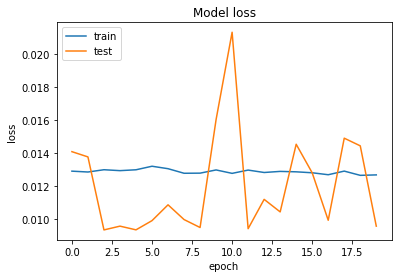

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.savefig(PLOTS_PATH + 'cnn_Model loss' + '.png')
plt.show()


In [ ]:
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import ZeroPadding1D
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import AveragePooling1D
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [ ]:
best_model = load_model(os.path.join(CHECK_PATH , 'PRSA_data_Air_Pressure_1DConv_weights.03-0.0094.hdf5'))
preds = best_model.predict(X_val)
pred_PRES = np.squeeze(scaler.inverse_transform(preds))


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(df_val['PRES'].loc[7:], pred_PRES)
print('R-squared for the validation set:', round(r2, 4))


from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(df_val['PRES'].loc[7:], pred_PRES)
print('MAE for the validation set:', round(mae, 4))


R-squared for the validation set: 0.9952
MAE for the validation set: 0.5151


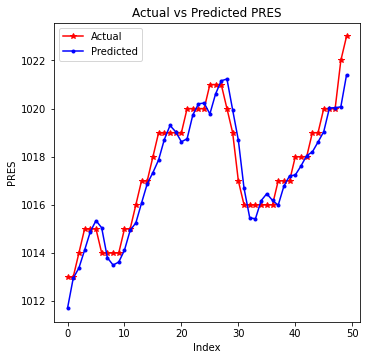

In [ ]:
#Let's plot the first 50 actual and predicted values of PRES.
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['PRES'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_PRES[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted PRES')
plt.ylabel('PRES')
plt.xlabel('Index')

plt.savefig(PLOTS_PATH + 'cnn_Actual vs Predicted PRES' + '.png')
plt.show()


## Lets see the pm2.5 variable



In [ ]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime


In [ ]:
# Read the dataset into a pandas df
df = pd.read_csv(DATA_PATH + 'PRSA_data_2010.1.1-2014.12.31.csv')

print('Shape of the dataframe:', df.shape)

# Show some details
df.head(5)


Shape of the dataframe: (43824, 13)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
"""
Rows having NaN values in column pm2.5 are dropped.
"""
df.dropna(subset=['pm2.5'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)


Text(0.5, 1.0, 'Box plot of pm2.5')

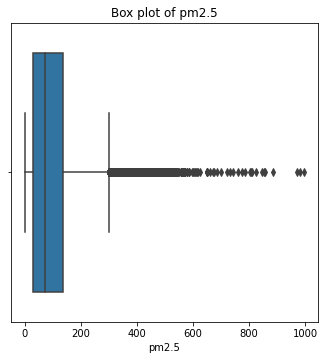

In [ ]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df['pm2.5'])
g.set_title('Box plot of pm2.5')


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'pm2.5 readings')

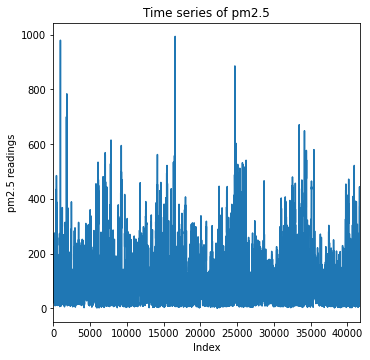

In [ ]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'])
g.set_title('Time series of pm2.5')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'pm2.5 readings')

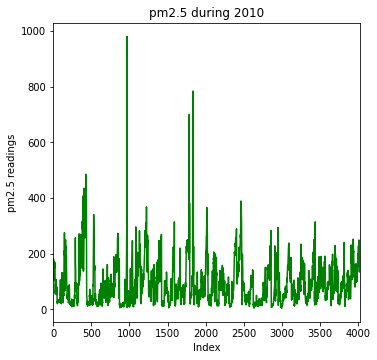

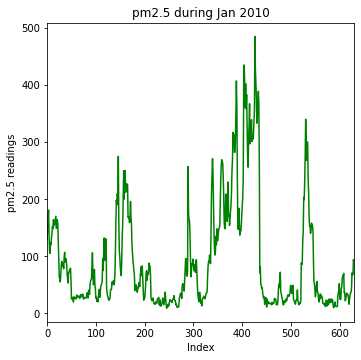

In [ ]:
#Let's plot the series for six months to check if any pattern apparently exists.
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=6,day=30)], color='g')
g.set_title('pm2.5 during 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

#Let's zoom in on one month.
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=1,day=31)], color='g')
g.set_title('pm2.5 during Jan 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_pm2.5'] = scaler.fit_transform(np.array(df['pm2.5']).reshape(-1, 1))


In [ ]:
"""
Let's start by splitting the dataset into train and validation. The dataset's time period if from
Jan 1st, 2010 to Dec 31st, 2014. The first fours years - 2010 to 2013 is used as train and
2014 is kept for validation.
"""
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)


Shape of train: (33096, 15)
Shape of test: (8661, 15)


In [ ]:
#First five rows of train
df_train.head()


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
0,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00,0.129779
1,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00,0.148893
2,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00,0.159960
3,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00,0.182093
4,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00,0.138833


In [ ]:
#First five rows of validation
df_val.head()


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
33096,35065,2014,1,1,0,24.0,-20,7.0,1014.0,NW,143.48,0,0,2014-01-01 00:00:00,0.024145
33097,35066,2014,1,1,1,53.0,-20,7.0,1013.0,NW,147.50,0,0,2014-01-01 01:00:00,0.053320
33098,35067,2014,1,1,2,65.0,-20,6.0,1013.0,NW,151.52,0,0,2014-01-01 02:00:00,0.065392
33099,35068,2014,1,1,3,70.0,-20,6.0,1013.0,NW,153.31,0,0,2014-01-01 03:00:00,0.070423
33100,35069,2014,1,1,4,79.0,-18,3.0,1012.0,cv,0.89,0,0,2014-01-01 04:00:00,0.079477


In [ ]:
#Reset the indices of the validation set
df_val.reset_index(drop=True, inplace=True)


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


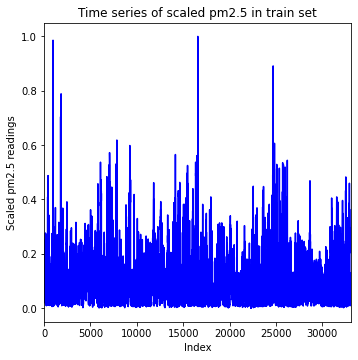

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


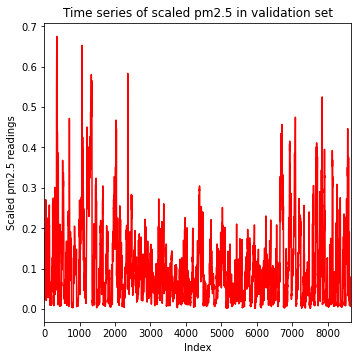

In [ ]:
"""
The train and validation time series of scaled pm2.5 is also plotted.
"""

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_train['scaled_pm2.5'], color='b')
g.set_title('Time series of scaled pm2.5 in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

plt.savefig(PLOTS_PATH + 'cnn_Time series of scaled pm2.5 in train set' + '.png')
plt.show()


plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_val['scaled_pm2.5'], color='r')
g.set_title('Time series of scaled pm2.5 in validation set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

plt.savefig(PLOTS_PATH + 'cnn_Time series of scaled pm2.5 in validation set' + '.png')
plt.show()


In [ ]:
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y
    

In [ ]:
X_train, y_train = makeXy(df_train['scaled_pm2.5'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)


Shape of train arrays: (33089, 7) (33089,)


In [ ]:
X_val, y_val = makeXy(df_val['scaled_pm2.5'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)


Shape of validation arrays: (8654, 7) (8654,)


In [ ]:
#X_train and X_val are reshaped to 3D arrays
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)),\
                 X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
print('Shape of arrays after reshaping:', X_train.shape, X_val.shape)


Shape of arrays after reshaping: (33089, 7, 1) (8654, 7, 1)


In [ ]:
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import ZeroPadding1D
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import AveragePooling1D
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint


In [ ]:
#Define input layer which has shape (None, 7) and of type float32. None indicates the number of instances
input_layer = Input(shape=(7,1), dtype='float32')


In [ ]:
#Add zero padding
zeropadding_layer = ZeroPadding1D(padding=1)(input_layer)


In [ ]:
#Add 1D convolution layers
conv1D_layer1 = Conv1D(64, 3, strides=1, use_bias=True)(zeropadding_layer)
conv1D_layer2 = Conv1D(32, 3, strides=1, use_bias=True)(conv1D_layer1)


In [ ]:
#Add AveragePooling1D layer
avgpooling_layer = AveragePooling1D(pool_size=3, strides=1)(conv1D_layer2)


In [ ]:
#Add Flatten layer
flatten_layer = Flatten()(avgpooling_layer)


In [ ]:
#A couple of Dense layers are also added
dense_layer1 = Dense(32)(avgpooling_layer)
dense_layer2 = Dense(16)(dense_layer1)


In [ ]:
dropout_layer = Dropout(0.2)(flatten_layer)

#Finally the output layer gives prediction for the next day's air pressure.
output_layer = Dense(1, activation='linear')(dropout_layer)


In [ ]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')#SGD(lr=0.001, decay=1e-5))
ts_model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 7, 1)]            0         
_________________________________________________________________
zero_padding1d_1 (ZeroPaddin (None, 9, 1)              0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7, 64)             256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5, 32)             6176      
_________________________________________________________________
average_pooling1d_1 (Average (None, 3, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 96)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 96)                0   

In [ ]:
save_weights_at = os.path.join(CHECK_PATH , 'PRSA_data_PM2.5_1DConv_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
history = ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)


Epoch 1/20
2069/2069 [==============================] - 4s 2ms/step - loss: 0.0221 - val_loss: 0.0136
Epoch 2/20
2069/2069 [==============================] - 4s 2ms/step - loss: 0.0169 - val_loss: 0.0145
Epoch 3/20
2069/2069 [==============================] - 3s 2ms/step - loss: 0.0164 - val_loss: 0.0141
Epoch 4/20
2069/2069 [==============================] - 4s 2ms/step - loss: 0.0165 - val_loss: 0.0170
Epoch 5/20
2069/2069 [==============================] - 3s 2ms/step - loss: 0.0165 - val_loss: 0.0143
Epoch 6/20
2069/2069 [==============================] - 4s 2ms/step - loss: 0.0162 - val_loss: 0.0138
Epoch 7/20
2069/2069 [==============================] - 4s 2ms/step - loss: 0.0165 - val_loss: 0.0142
Epoch 8/20
2069/2069 [==============================] - 4s 2ms/step - loss: 0.0162 - val_loss: 0.0138
Epoch 9/20
2069/2069 [==============================] - 4s 2ms/step - loss: 0.0161 - val_loss: 0.0162
Epoch 10/20
2069/2069 [==============================] - 4s 2ms/step - loss: 0.016

dict_keys(['loss', 'val_loss'])


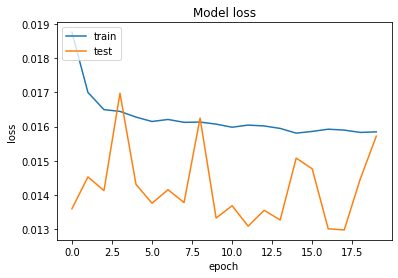

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.savefig(PLOTS_PATH + 'cnn_Model loss' + '.png')
plt.show()


In [ ]:
best_model = load_model(os.path.join(CHECK_PATH , 'PRSA_data_PM2.5_1DConv_weights.18-0.0130.hdf5'))
preds = best_model.predict(X_val)
pred_pm25 = scaler.inverse_transform(preds)
pred_pm25 = np.squeeze(pred_pm25)


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(df_val['pm2.5'].loc[7:], pred_pm25)
print('MAE for the validation set:', round(mae, 4))


MAE for the validation set: 12.9009


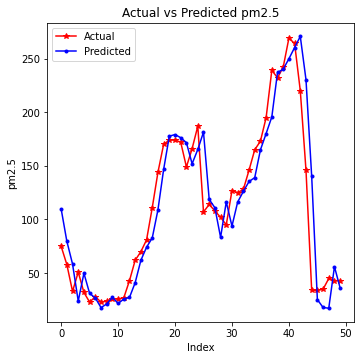

In [ ]:
#Let's plot the first 50 actual and predicted values of pm2.5.
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['pm2.5'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5')
plt.ylabel('pm2.5')
plt.xlabel('Index')

plt.savefig(PLOTS_PATH + 'cnn_Actual vs Predicted pm2.5' + '.png')
plt.show()
